In [42]:
import awkward as ak
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import os
import time
from tqdm.auto import tqdm
from multiprocessing import Pool
import matplotlib.pyplot as plt


In [43]:
prefix_match = {
    "JZ0": 'user.mswiatlo.39955613',
    "JZ1": 'user.mswiatlo.39955646',
    "JZ2": 'user.mswiatlo.39955678',
    "JZ3": 'user.mswiatlo.39955704',
    "JZ4": 'user.mswiatlo.39955735',
    "JZ5": 'user.mswiatlo.39955768',
    "JZ6": 'user.mswiatlo.39955825',
}

prefix_to_set = {j:i for i, j in prefix_match.items()}


def read_parquet(filename):
    table = pq.read_table(filename)
    ak_array = ak.from_arrow(table)
    return ak_array

completed_root_to_awk = [2, 4, 5]

data_folder_path = "/home/jhimmens/workspace/jetpointnet/pnet_data/processed_files/attempt_1_june_18/full_set/AwkwardArrs/deltaR=0.2/train"
arr_files = {f"JZ{i}": [f for f in os.listdir(data_folder_path) if f.endswith(".parquet") and f.startswith(prefix_match[f"JZ{i}"])][:10] for i in completed_root_to_awk}
ak_arrs = {f"JZ{i}": ak.concatenate([read_parquet(data_folder_path + '/' + f) for f in arr_files[f"JZ{i}"]]) for i in completed_root_to_awk}

Starting JZ2


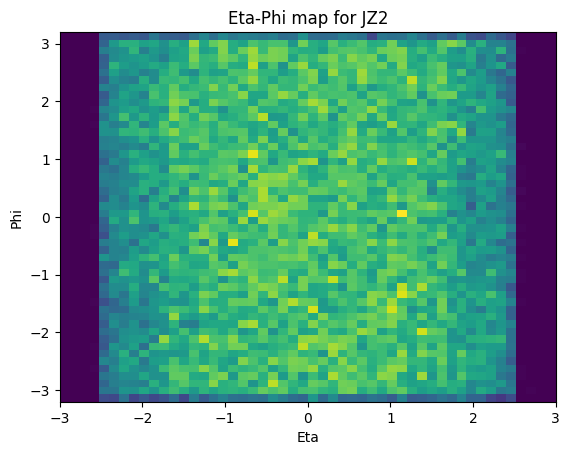

Starting JZ4


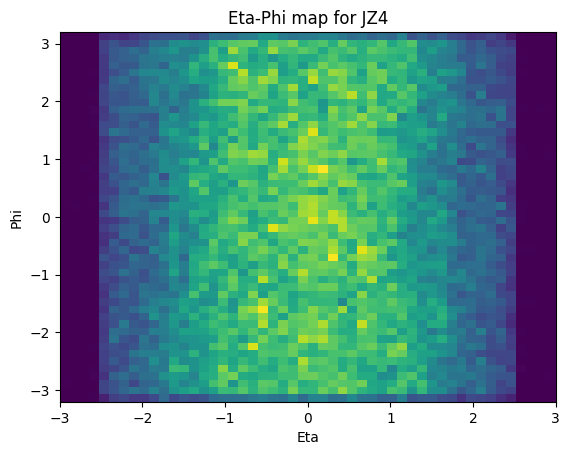

Starting JZ5


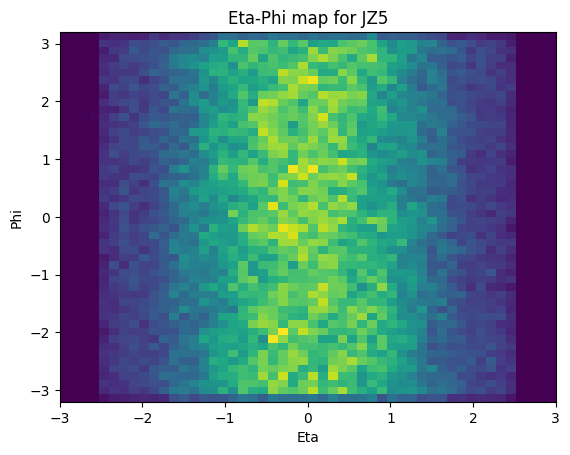

In [44]:
    
# eta-phi map for tracks with 0 subtracted energy and 0 visible energ

import itertools

for i in ak_arrs.keys():
    print(f"Starting {i}")
    """print(len(ak_arrs[i][0]))
    events = ak.zip(ak_arrs[i])
    print(events)
    eta = ak.flatten(events['trackEta'].array(library="ak"))
    phi = ak.flatten(events['trackPhi'].array(library="ak"))

    flat_eta = ak.to_numpy(eta)
    flat_phi = ak.to_numpy(phi)"""

    eta_list = np.array(list(itertools.chain(*[[track['trackEta'] for track in event] for event in ak_arrs[i]])))
    phi_list = np.array(list(itertools.chain(*[[track['trackPhi'] for track in event] for event in ak_arrs[i]])))
    #phi_list = np.array(list(itertools.chain([[track['trackPhi'] for track in event] for event in ak_arrs[i]])


    plt.hist2d(eta_list, phi_list, bins=50, range=[[-3, 3], [-3.2, 3.2]], cmap='viridis')
    plt.xlabel('Eta')
    plt.ylabel('Phi')
    plt.title(f"Eta-Phi map for {i}")# = 0$  and $E_{visible} = 0$")
    plt.savefig(f"eta_phi_map_{i}.png", dpi=500)
    plt.show()

In [45]:
print(dir(ak_arrs["JZ2"][0][0]))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__self_class__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__thisclass__', '_attrs', '_behavior', '_layout', '_numbaview', 'associated_cells', 'associated_tracks', 'attrs', 'behavior', 'eventNumber', 'fields', 'is_tuple', 'layout', 'nbytes', 'numba_type', 'show', 'to_list', 'tolist', 'total_associated_cell_energy', 'trackEta', 'trackEta_EMB2', 'trackEta_EME2', 'trackID', 'trackPhi', 'trackPhi_EMB2', 'trackPhi_EME2', 'trackPt', 'trackSubtractedCaloEnergy', 'track_layer_intersections', 'track_part_Idx', 'type', 'typestr']


In [46]:
print(ak_arrs["JZ2"][0][0].fields)

['trackID', 'trackEta', 'trackPhi', 'track_part_Idx', 'eventNumber', 'trackEta_EMB2', 'trackPhi_EMB2', 'trackEta_EME2', 'trackPhi_EME2', 'trackSubtractedCaloEnergy', 'trackPt', 'trackChiSquared/trackNumberDOF', 'track_layer_intersections', 'total_associated_cell_energy', 'associated_cells', 'associated_tracks']


Starting JZ2


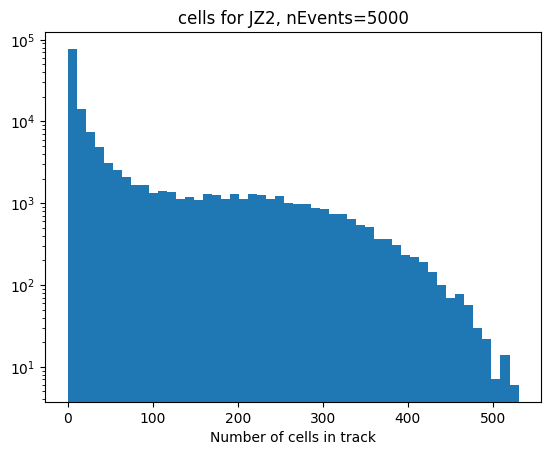

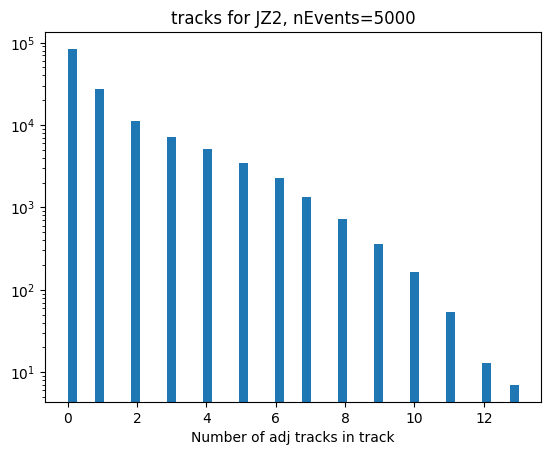

Starting JZ4


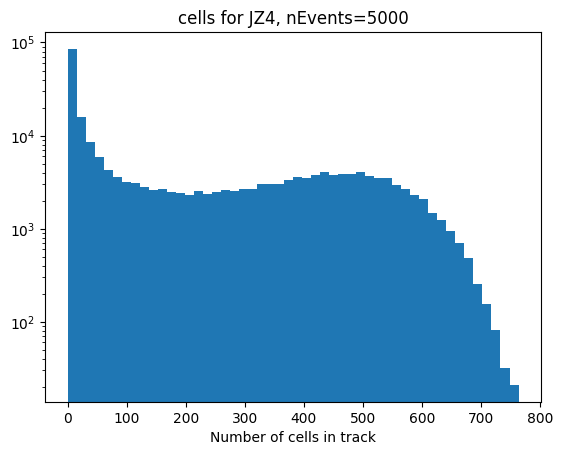

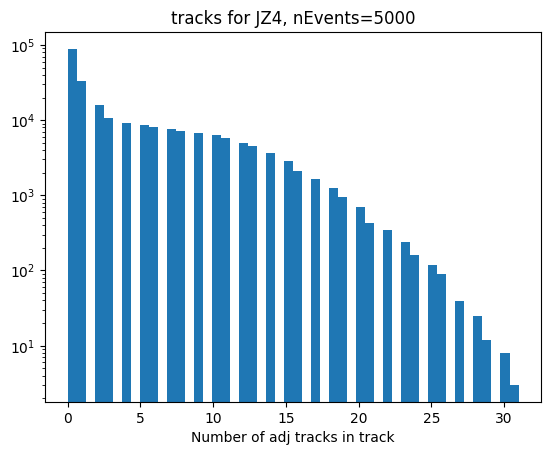

Starting JZ5


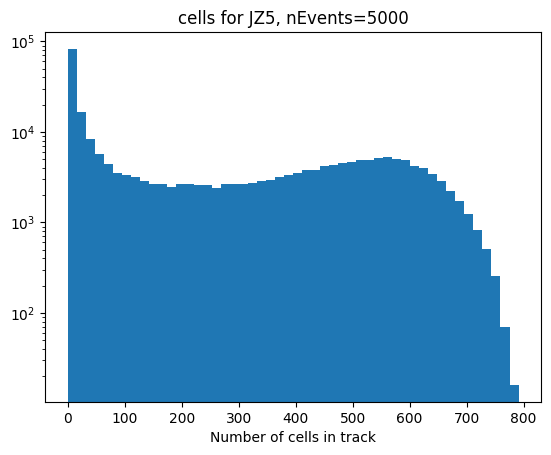

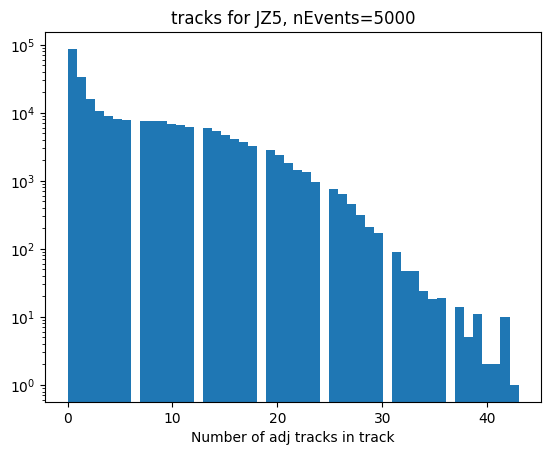

In [47]:
'associated_cells'
'associated_tracks'
for i in ak_arrs.keys():
    print(f"Starting {i}")
    """print(len(ak_arrs[i][0]))
    events = ak.zip(ak_arrs[i])
    print(events)
    eta = ak.flatten(events['trackEta'].array(library="ak"))
    phi = ak.flatten(events['trackPhi'].array(library="ak"))

    flat_eta = ak.to_numpy(eta)
    flat_phi = ak.to_numpy(phi)"""

    num_cells_list = np.array(list(itertools.chain(*[[len(track['associated_cells']) for track in event] for event in ak_arrs[i]])))
    num_tracks_list = np.array(list(itertools.chain(*[[len(track['associated_tracks']) for track in event] for event in ak_arrs[i]])))
    #phi_list = np.array(list(itertools.chain([[track['trackPhi'] for track in event] for event in ak_arrs[i]])


    plt.hist(num_cells_list, bins=50)
    plt.title(f"cells for {i}, nEvents=5000")# = 0$  and $E_{visible} = 0$")
    plt.xlabel("Number of cells in track")
    plt.yscale('log')
    plt.savefig(f"cell_hist_{i}.png", dpi=500)
    plt.show()
    plt.hist(num_tracks_list, bins=50)
    plt.xlabel("Number of adj tracks in track")
    plt.yscale('log')
    plt.title(f"tracks for {i}, nEvents=5000")# = 0$  and $E_{visible} = 0$")
    plt.savefig(f"track_hist_{i}.png", dpi=500)
    plt.show()